In [1]:
import pandas as pd
import numpy as np

In [2]:
!git clone https://github.com/adeepH/DravidianOffensive.git

fatal: destination path 'DravidianOffensive' already exists and is not an empty directory.


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv('/content/DravidianOffensive/Datasets/Pseudo Labels/Pseudo_Mal.csv')
train[0]=train['tweets']
train[1]=train['labels']
train=train.drop(columns=['Unnamed: 0','tweets','labels'])
print(train)


                                                       0  1
0      പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്ത...  0
1      ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...  0
2      ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...  0
3              Sushin syam  Shaiju khalid  Midhun manual  0
4                              J A K E S.   B EJ O Y !!!  0
...                                                  ... ..
38014  {'ml': 'അരുടേയും കാണീർ ഓപ്പൺ വന്നദല്ല ഞൈൻ... !...  0
38015  {'ml': 'മലയാളം ലേഡി സൂപ്പർ സ്റ്റാർ......അതുക് ...  0
38016  {'ml': 'ഇൻഡ്യൻ സിനിമ ലിവിംഗ് ലെഗഡ് മോളിവുഡ് കി...  0
38017  {'ml': 'ചെറിയ തെറ്റുകൾ എടുത്തു കളയണം. പിന്നീട്...  0
38018  {'ml': 'എന്റ് പൊന്നോ..... എടാർ എട്ടം.... ഇത് പ...  0

[38019 rows x 2 columns]


In [5]:
test = pd.read_csv('/content/mal_full_offensive_test_with_labels.csv', sep='\t',  header=None)
test['labels']=LabelEncoder().fit_transform(test[1])
test[1]=test['labels']
test=test.drop(columns=[2,'labels'])
test

,0,1
0,അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ Suraj ആണ് നടൻ ന്...,0
1,എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി vivo vid...,0
2,Fefka ee padam release cheyyan samadhicho?,0
3,അആഹാ.. സംഗീതം ജെക്‌സ് ബിജോയ് ആണ് അപ്പൊ പൊട്ടലു...,0
4,Ravile thane views likes ethra ayyi enn nokan ...,0
...,...,...
1996,Swargatthil ninnu purathaakkappetta daivatthin...,0
1997,Ivide Palakkad Jayettan Fans club nnu ashamsak...,0
1998,ഈ പടത്തിന് വെയിറ്റ് ചെയ്യുന്ന മമ്മൂക്ക ഫാൻസും,0
1999,കട്ട ലാലേട്ടൻ ഫാൻസ് ഒരു ലൈക് തന്നിട്ട് പോവാമോ ...,0


In [6]:
df=train.filter([1,0], axis=1)
df_test=test.filter([1,0],axis=1)

In [7]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [8]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [9]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (38019 items)
x: LMTextList
xxbos പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്തം രാജവയത് അല്ല,xxbos ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്‌ അടി,xxbos ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ xxmaj royal xxmaj mech ആടാ ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal xxmaj mech ആടാ,xxbos xxmaj sushin syam xxmaj xxunk khalid xxmaj midhun manual,xxbos j a k e xxup s. b xxup xxunk o y ! ! !
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (2001 items)
x: LMTextList
xxbos അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ xxmaj suraj ആണ് നടൻ ന്ന് തോന്നുന്നു,xxbos എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി xxunk xxunk ചെയ്തപോലെ,xxbos xxmaj xxunk ee padam release cheyyan xxunk ?,xxbos xxunk .. xxunk xxunk xxunk ആണ് അപ്പൊ xxunk xxunk ഒക്കെ ഇണ്ടാവും,xxbos xxmaj ravile thane views likes ethra ayyi enn nokan xxmaj vanavar adi like evide
y: LMLabelList
,,,,
Path: .;

Test: None>

In [10]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.59E-02
Min loss divided by 10: 5.22E-03


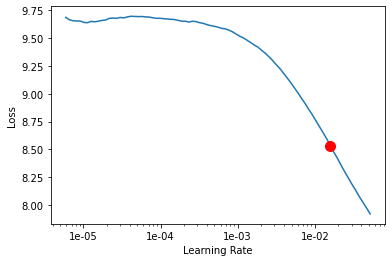

In [11]:
learn.lr_find(start_lr=2e-6, end_lr=1e-1)
learn.recorder.plot(suggestion = True)

In [12]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.141813,5.057573,0.240216,00:22
1,3.583842,4.314517,0.319382,00:22


In [13]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.104606,4.136168,0.329762,00:26
1,2.533844,3.538681,0.411235,00:26
2,1.739818,3.253146,0.464881,00:26


In [14]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 8.32E-05


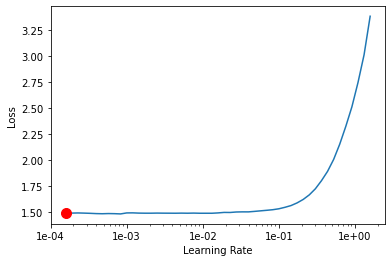

In [15]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [16]:
learn.fit_one_cycle(3, slice(2e-2/(2.6**4), 2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.738182,3.263510,0.464546,00:22
1,1.600687,3.089592,0.493527,00:22
2,1.300326,3.012708,0.508184,00:22


In [17]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-04
Min loss divided by 10: 1.91E-05


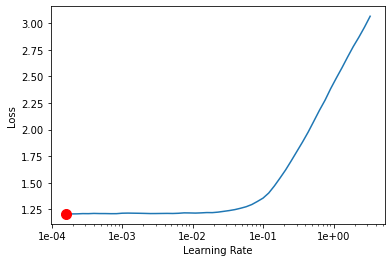

In [18]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [19]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.263456,2.994177,0.518936,00:22
1,1.221965,2.896931,0.536644,00:22
2,1.096950,2.883077,0.541629,00:22


In [20]:
#save the encoder model
learn.save_encoder('my_encoder')

In [21]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (38019 items)
x: TextList
xxbos പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്തം രാജവയത് അല്ല,xxbos ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്‌ അടി,xxbos ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ xxmaj royal xxmaj mech ആടാ ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal xxmaj mech ആടാ,xxbos xxmaj sushin syam xxmaj xxunk khalid xxmaj midhun manual,xxbos j a k e xxup s. b xxup xxunk o y ! ! !
y: CategoryList
0,0,0,0,0
Path: .;

Valid: LabelList (2001 items)
x: TextList
xxbos അപ്പൊ ഇതൊരൊന്നൊരാ മൊതലാണല്ലേ xxmaj suraj ആണ് നടൻ ന്ന് തോന്നുന്നു,xxbos എന്ത് ഊള എഡിറ്റിംഗ് ആടോ ഇത് ഒരുമാതിരി xxunk xxunk ചെയ്തപോലെ,xxbos xxmaj xxunk ee padam release cheyyan xxunk ?,xxbos xxunk .. xxunk xxunk xxunk ആണ് അപ്പൊ xxunk xxunk ഒക്കെ ഇണ്ടാവും,xxbos xxmaj ravile thane views likes ethra ayyi enn nokan xxmaj vanavar adi like evide
y: CategoryList
0,0,0,0,0
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-01
Min loss divided by 10: 9.12E-02


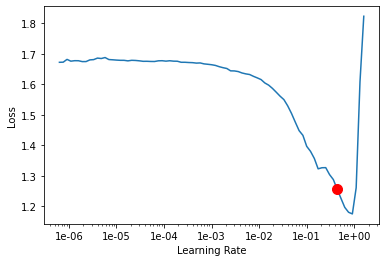

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [24]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.200925,0.313558,0.914543,0.327168,00:14
1,0.150856,0.287882,0.916542,0.000000,00:15
2,0.149225,0.279732,0.919540,0.000000,00:15


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

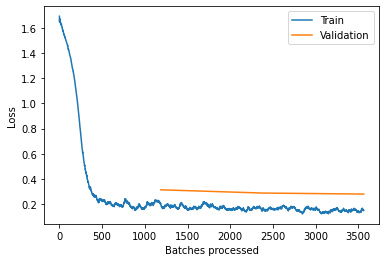

In [25]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 3.98E-05


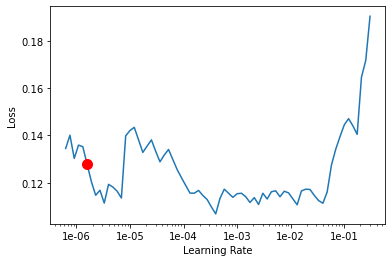

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.128768,0.277032,0.921539,0.408761,00:18
1,0.118008,0.223117,0.925038,0.549869,00:17


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 6.92E-07


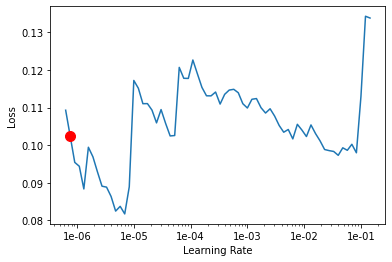

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.119011,0.192740,0.940030,0.545356,00:27
1,0.072449,0.172040,0.953523,0.706287,00:28


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [30]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.085589,0.180058,0.947026,0.675304,00:37
1,0.048110,0.167207,0.960520,0.768432,00:35


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.052425,0.208680,0.951524,0.696654,00:41
1,0.034126,0.188713,0.951524,0.719884,00:39


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.019662,0.200816,0.956522,0.752197,00:42
1,0.027453,0.196844,0.958521,0.762731,00:41
2,0.017737,0.201105,0.961020,0.770056,00:42


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [31]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [32]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,1743,9,10,8,25
1,5,12,1,0,0
2,2,0,16,1,0
3,8,2,0,20,0
4,7,0,0,0,132


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[1743    9   10    8   25]
 [   5   12    1    0    0]
 [   2    0   16    1    0]
 [   8    2    0   20    0]
 [   7    0    0    0  132]]
0.9610194902548725


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.9875    0.9710    0.9792      1795
           1     0.5217    0.6667    0.5854        18
           2     0.5926    0.8421    0.6957        19
           3     0.6897    0.6667    0.6780        30
           4     0.8408    0.9496    0.8919       139

    accuracy                         0.9610      2001
   macro avg     0.7265    0.8192    0.7660      2001
weighted avg     0.9649    0.9610    0.9624      2001

